In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
#umang (01/04)
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with (umang 01/04 apr) two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Using TensorFlow backend.


In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 1188 samples, validate on 298 samples
Epoch 1/20
1188/1188 [==============================] - 199s 167ms/step - loss: 0.6973 - accuracy: 0.5362 - val_loss: 0.6570 - val_accuracy: 0.6510
Epoch 2/20
1188/1188 [==============================] - 188s 159ms/step - loss: 0.5522 - accuracy: 0.7247 - val_loss: 0.4473 - val_accuracy: 0.7785
Epoch 3/20
1188/1188 [==============================] - 186s 157ms/step - loss: 0.3899 - accuracy: 0.8392 - val_loss: 0.4439 - val_accuracy: 0.8188
Epoch 4/20
1188/1188 [==============================] - 185s 156ms/step - loss: 0.2784 - accuracy: 0.8948 - val_loss: 0.4403 - val_accuracy: 0.8154
Epoch 5/20
1188/1188 [==============================] - 195s 165ms/step - loss: 0.2642 - accuracy: 0.8956 - val_loss: 0.3261 - val_accuracy: 0.8758
Epoch 6/20
1188/1188 [==============================] - 185s 156ms/step - loss: 0.2492 - accuracy: 0.9040 - val_loss: 0.3430 - val_accuracy: 0.8557
Epoch 7/20
1188/1188 [==============================] - 184s 155m

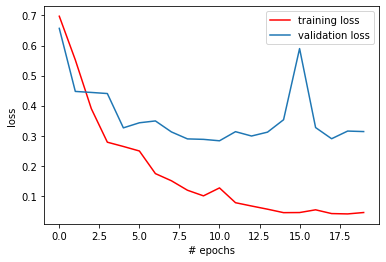

In [5]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

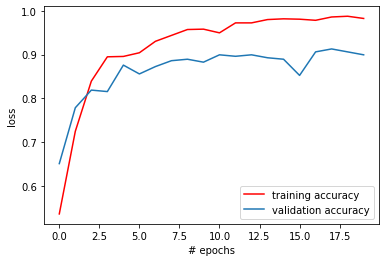

In [6]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [7]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 5s 36ms/step
[0.2662199637380199, 0.9275362491607666]


In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 200)       2000      
_________________________________________________________________
activation_1 (Activation)    (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_2 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 52900)            